Missing Values:
 Product_ID                64236
Date                      64236
Season                    64236
Holiday                   64236
Promotion                 64236
Inventory_Level           64236
Price                     64236
Sales_Volume              64236
Marketing_Spend           64236
Economic_Index            64236
Regional_Demand_Factor    64236
Discount_Rate             64236
dtype: int64


/var/folders/50/nnth3zxj1d39llbhys2n1kq40000gn/T/ipykernel_24625/2097802556.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')


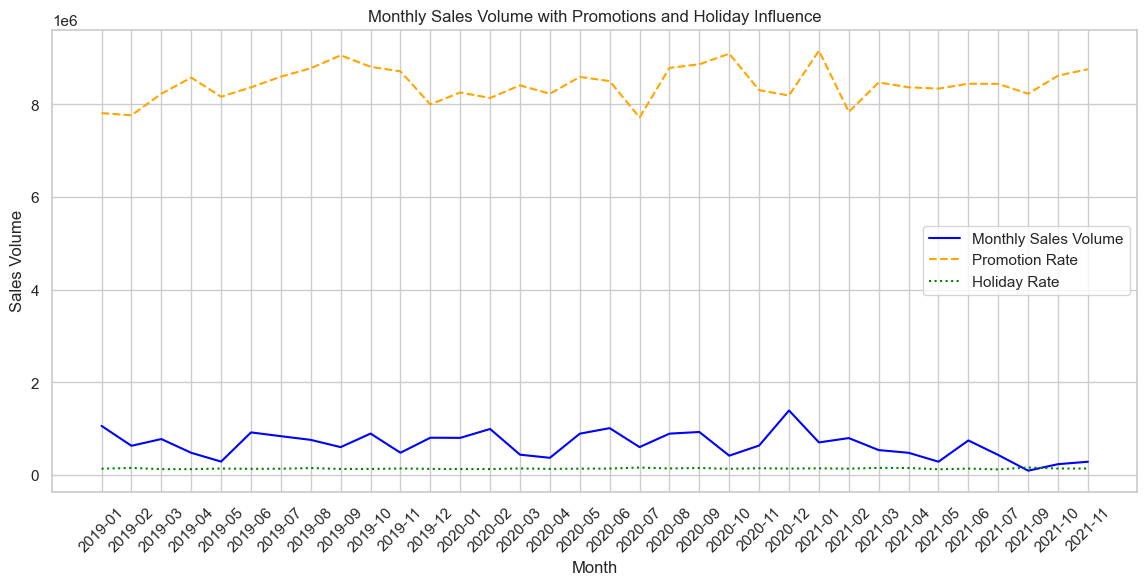

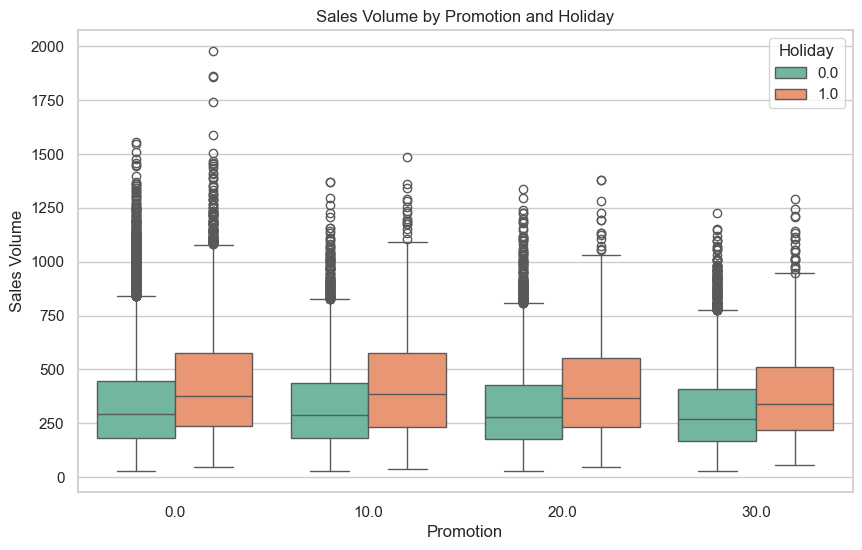

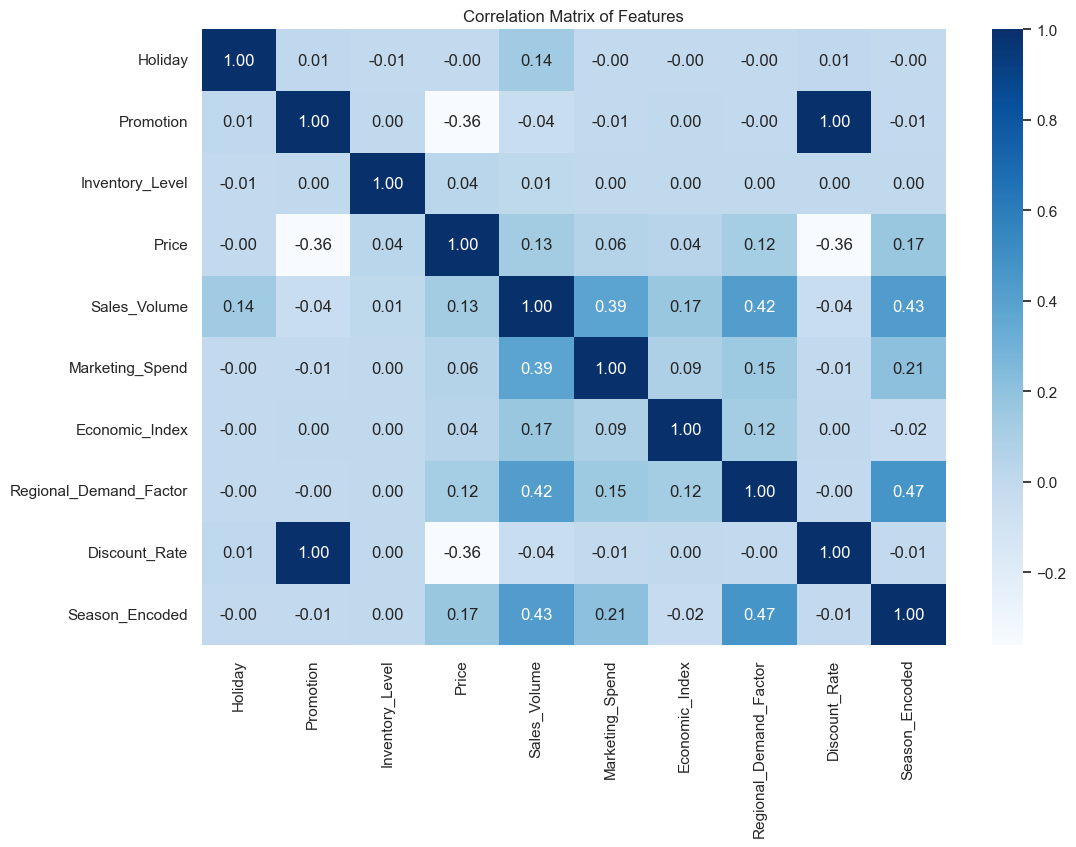

/var/folders/50/nnth3zxj1d39llbhys2n1kq40000gn/T/ipykernel_24625/2097802556.py:80: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
/var/folders/50/nnth3zxj1d39llbhys2n1kq40000gn/T/ipykernel_24625/2097802556.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Sales_Volume', data=df, palette="Set3")


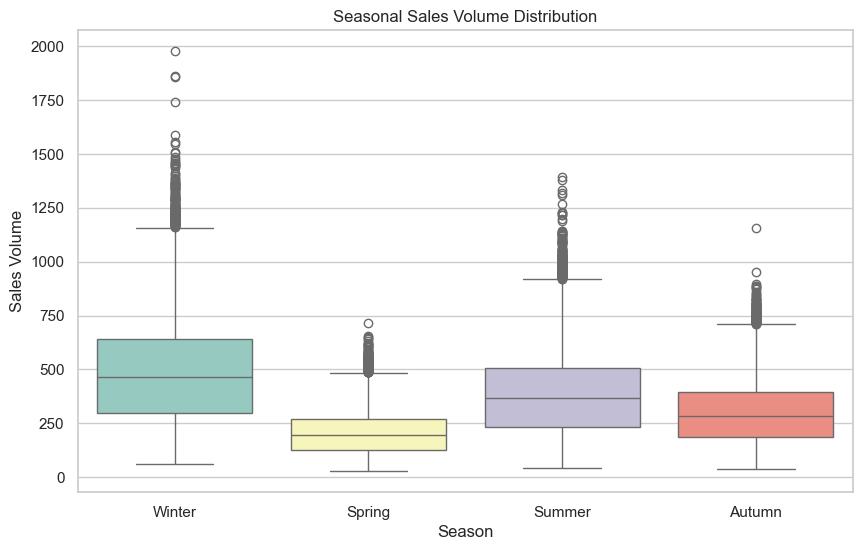

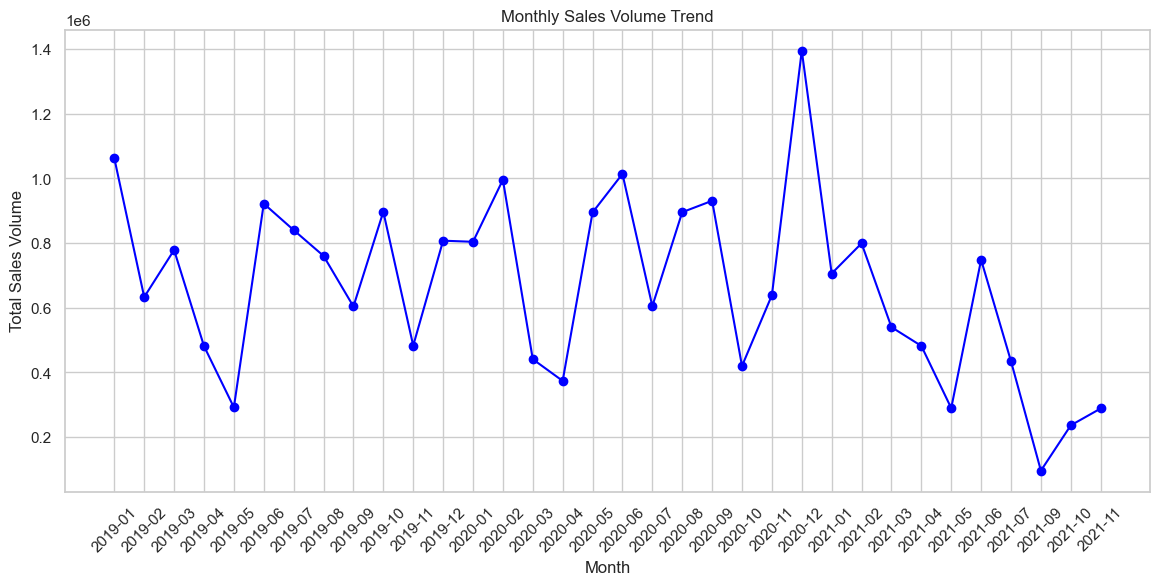

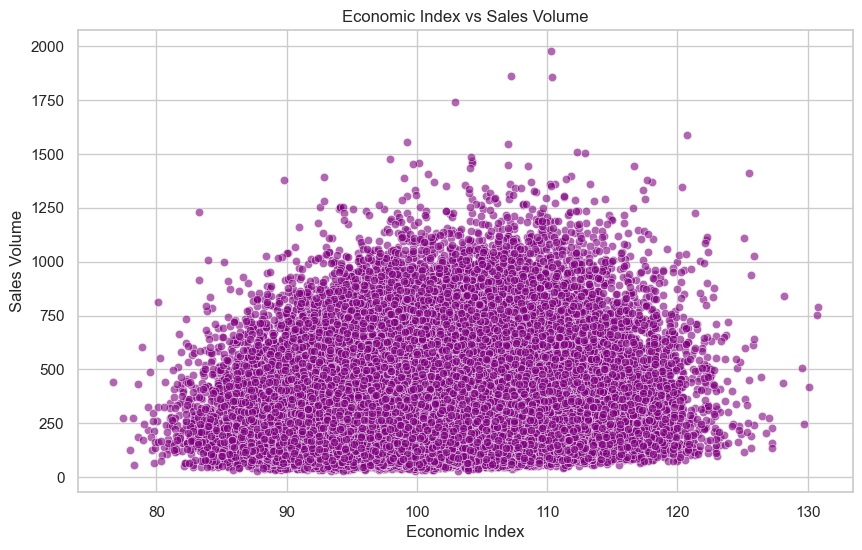

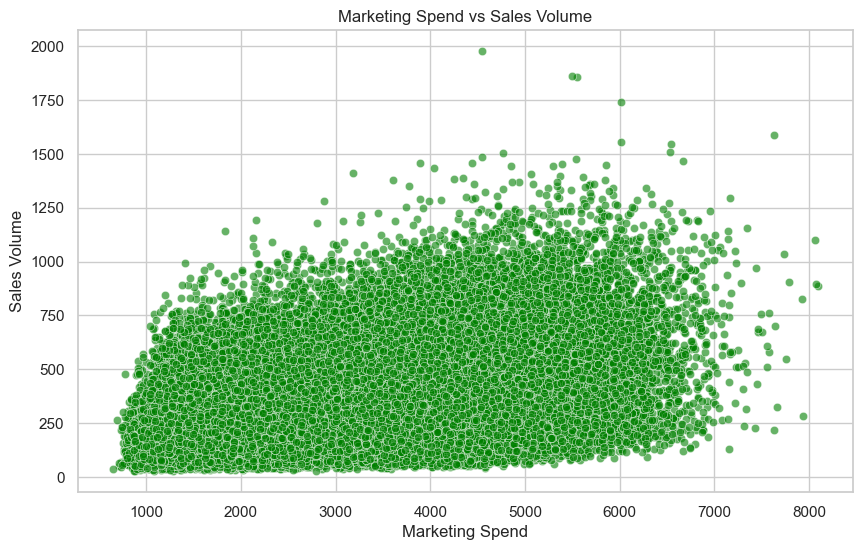

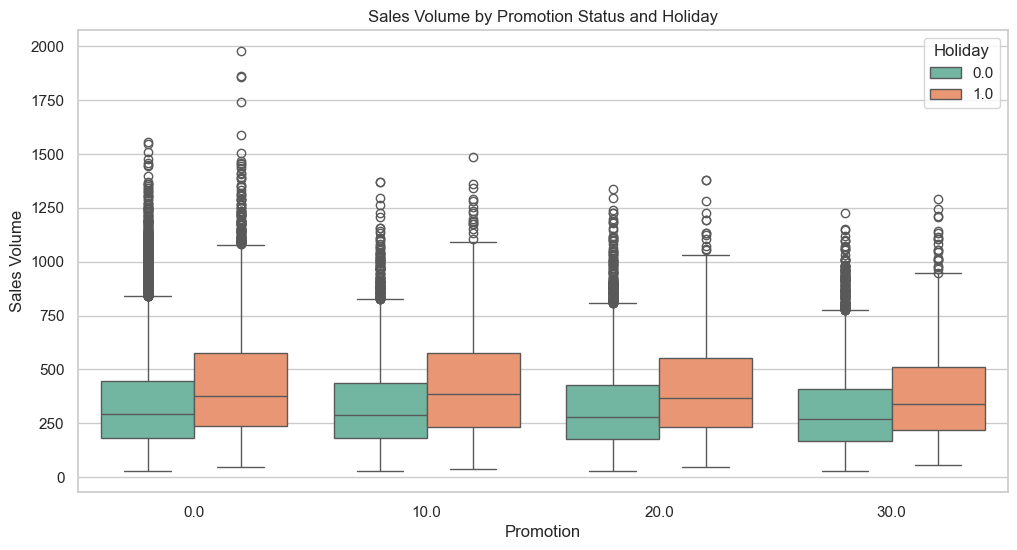

/var/folders/50/nnth3zxj1d39llbhys2n1kq40000gn/T/ipykernel_24625/2097802556.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount_Rate', y='Sales_Volume', data=df, palette="coolwarm")


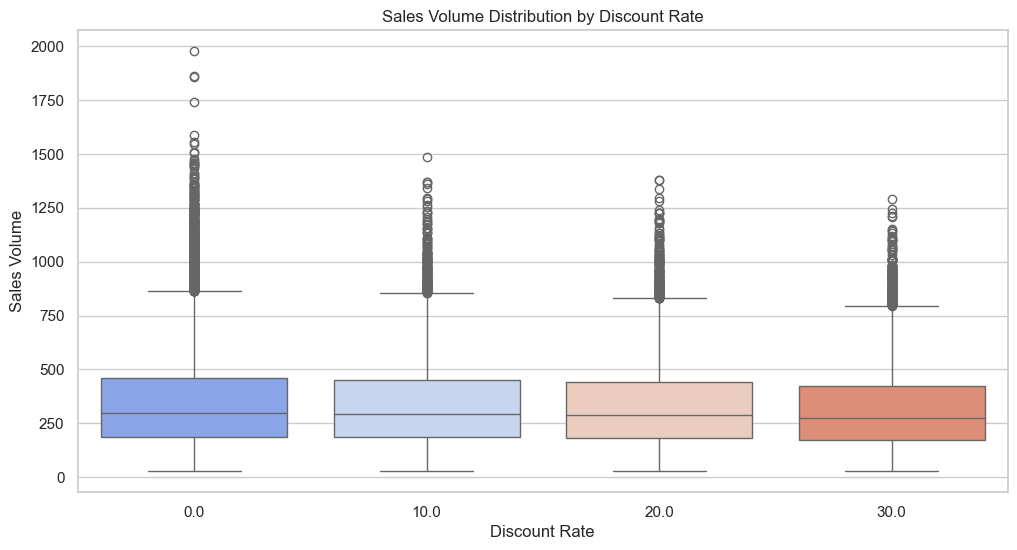

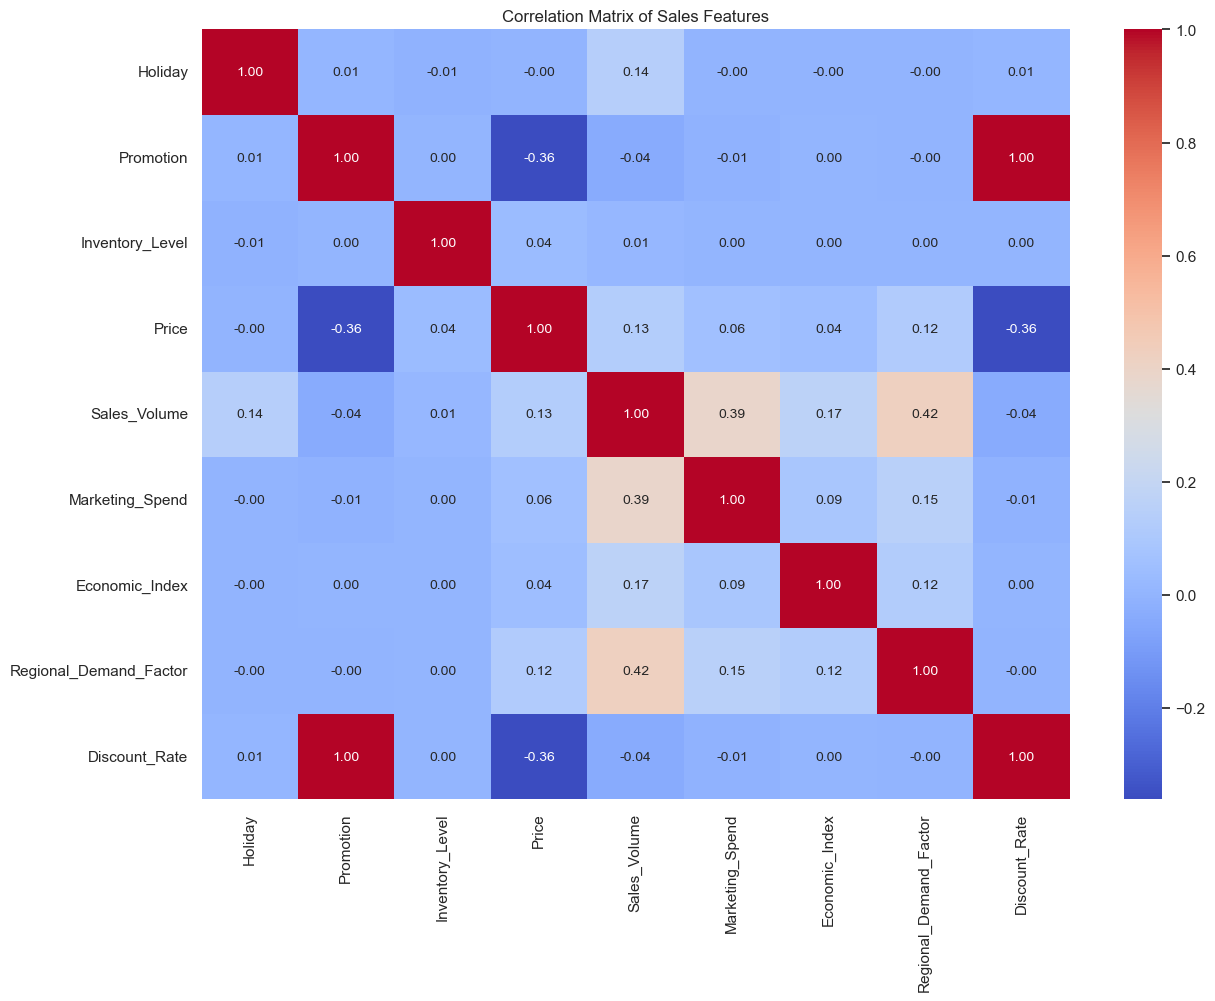

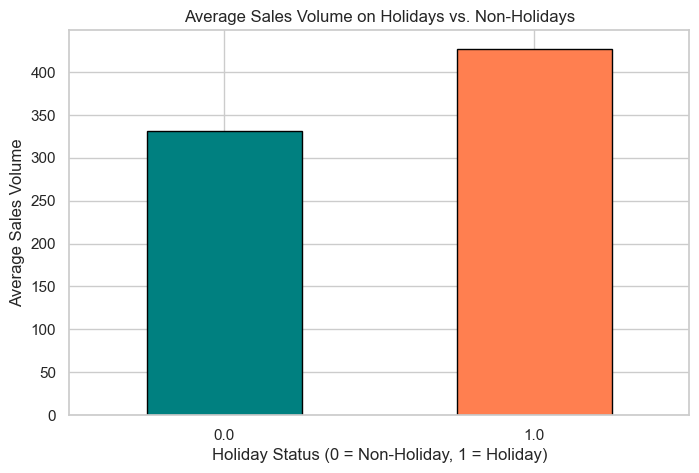

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Dataset
df = pd.read_csv('/Users/naveenganta/Desktop/analytics/Projects/RI/Enhanced_Sales_Forecasting_Dataset_Realistic_Refined.csv')

# Data Preprocessing
# Handle missing values if any
print("Missing Values:\n", df.isnull().sum())

# Encode 'Season' using LabelEncoder if exists
if 'Season' in df.columns:
    label_encoder = LabelEncoder()
    df['Season_Encoded'] = label_encoder.fit_transform(df['Season'])
    df = df.drop(columns=['Season'])  # Drop original 'Season' after encoding

# Scale numeric columns
scaler = StandardScaler()
numeric_cols = ['Price', 'Inventory_Level', 'Marketing_Spend', 'Economic_Index', 'Regional_Demand_Factor', 'Discount_Rate']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Exploratory Data Analysis (EDA)
sns.set(style="whitegrid")

# Monthly Sales Trend with Promotions and Holiday Indicators
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales_Volume'].sum()
monthly_promo = df.groupby('Month')['Promotion'].mean()
monthly_holiday = df.groupby('Month')['Holiday'].mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, label='Monthly Sales Volume', color='blue')
plt.plot(monthly_promo.index.astype(str), monthly_promo.values * monthly_sales.max(), '--', label='Promotion Rate', color='orange')
plt.plot(monthly_holiday.index.astype(str), monthly_holiday.values * monthly_sales.max(), ':', label='Holiday Rate', color='green')
plt.title("Monthly Sales Volume with Promotions and Holiday Influence")
plt.xlabel("Month")
plt.ylabel("Sales Volume")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Distribution of Sales Volume by Promotion and Holiday
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion', y='Sales_Volume', hue='Holiday', data=df, palette="Set2")
plt.title("Sales Volume by Promotion and Holiday")
plt.xlabel("Promotion")
plt.ylabel("Sales Volume")
plt.show()

# Correlation Matrix - Exclude non-numeric columns like 'Product_ID' and 'Date'
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load Dataset
df = pd.read_csv('/Users/naveenganta/Desktop/analytics/Projects/RI/Enhanced_Sales_Forecasting_Dataset_Realistic_Refined.csv')

# Convert 'Date' to datetime for better time-based analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')  # Monthly aggregation

# 1. Seasonal and Monthly Sales Patterns
# Seasonal Sales Volume Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Sales_Volume', data=df, palette="Set3")
plt.title("Seasonal Sales Volume Distribution")
plt.xlabel("Season")
plt.ylabel("Sales Volume")
plt.show()

# Monthly Sales Volume Trend
monthly_sales = df.groupby('Month')['Sales_Volume'].sum()
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, color='blue', marker='o', linestyle='-')
plt.title("Monthly Sales Volume Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Volume")
plt.xticks(rotation=45)
plt.show()

# 2. Impact of Economic Index and Marketing Spend on Sales Volume
# Economic Index vs Sales Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economic_Index', y='Sales_Volume', data=df, alpha=0.6, color="purple")
plt.title("Economic Index vs Sales Volume")
plt.xlabel("Economic Index")
plt.ylabel("Sales Volume")
plt.show()

# Marketing Spend vs Sales Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marketing_Spend', y='Sales_Volume', data=df, alpha=0.6, color="green")
plt.title("Marketing Spend vs Sales Volume")
plt.xlabel("Marketing Spend")
plt.ylabel("Sales Volume")
plt.show()

# 3. Distribution of Sales Volume by Promotion and Discount Rate
# Sales Volume by Promotion Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promotion', y='Sales_Volume', hue='Holiday', data=df, palette="Set2")
plt.title("Sales Volume by Promotion Status and Holiday")
plt.xlabel("Promotion")
plt.ylabel("Sales Volume")
plt.legend(title="Holiday")
plt.show()

# Sales Volume by Discount Rate
plt.figure(figsize=(12, 6))
sns.boxplot(x='Discount_Rate', y='Sales_Volume', data=df, palette="coolwarm")
plt.title("Sales Volume Distribution by Discount Rate")
plt.xlabel("Discount Rate")
plt.ylabel("Sales Volume")
plt.show()

# 4. Correlation Heatmap with Focused Analysis on Key Features
plt.figure(figsize=(14, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix of Sales Features")
plt.show()

# 5. Sales Volume Trend by Holiday and Non-Holiday Periods
# Group data by 'Holiday' to compare average sales volume
holiday_sales = df.groupby('Holiday')['Sales_Volume'].mean()
plt.figure(figsize=(8, 5))
holiday_sales.plot(kind='bar', color=['teal', 'coral'], edgecolor='black')
plt.title("Average Sales Volume on Holidays vs. Non-Holidays")
plt.xlabel("Holiday Status (0 = Non-Holiday, 1 = Holiday)")
plt.ylabel("Average Sales Volume")
plt.xticks(rotation=0)
plt.show()


# Feature Engineering
# Adding Lag Feature, Rolling Mean, Rolling Std, and Interaction Terms
df['Sales_Lag_1'] = df.groupby("Product_ID")['Sales_Volume'].shift(1)
df['Rolling_Mean_3'] = df.groupby("Product_ID")['Sales_Volume'].transform(lambda x: x.rolling(window=3).mean())
df['Rolling_Std_3'] = df.groupby("Product_ID")['Sales_Volume'].transform(lambda x: x.rolling(window=3).std())
df['Promotion_Marketing'] = df['Promotion'] * df['Marketing_Spend']
df['Holiday_Promotion_Interaction'] = df['Holiday'] * df['Promotion']

# Drop rows with NaN values created by lagging and rolling
df = df.dropna().reset_index(drop=True)

# Now the dataset is ready for modeling


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimized Random Forest Model Summary: {'MAE': 72.08377795797624, 'MSE': 9855.391051251967, 'RMSE': 99.27432221502178, 'R2_Score': 0.7582998530735494}


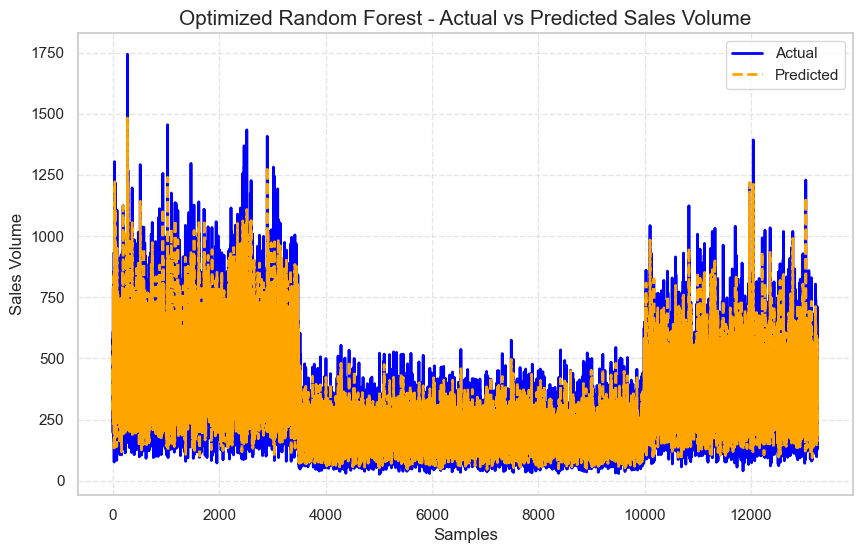

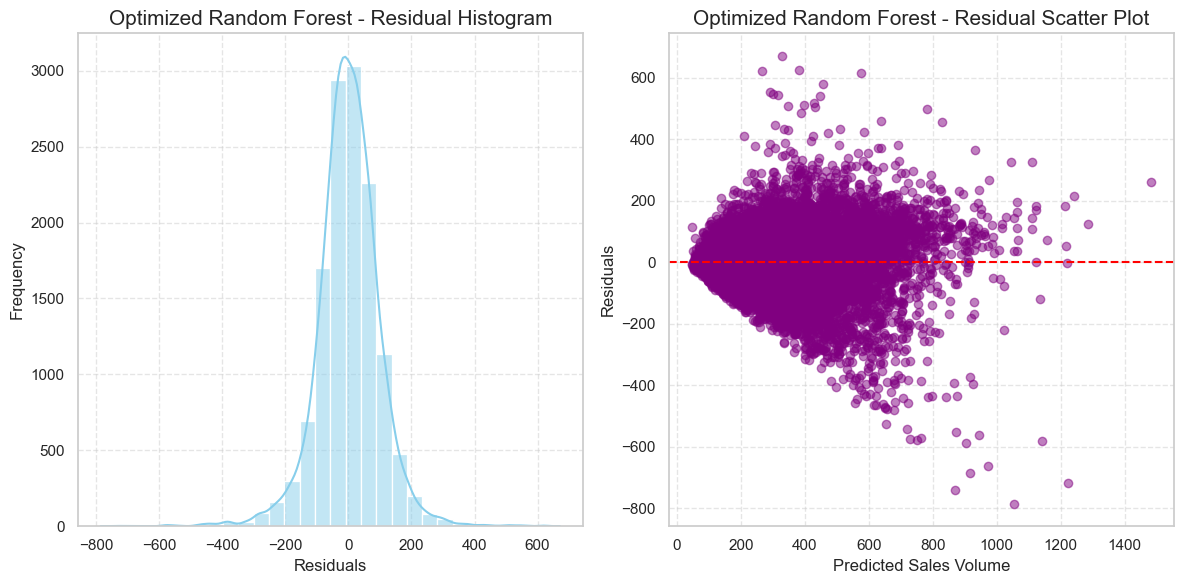

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimized XGBoost Model Summary: {'MAE': 65.2045108582556, 'MSE': 7988.602046269945, 'RMSE': 89.37897989051982, 'R2_Score': 0.8040822248169334}


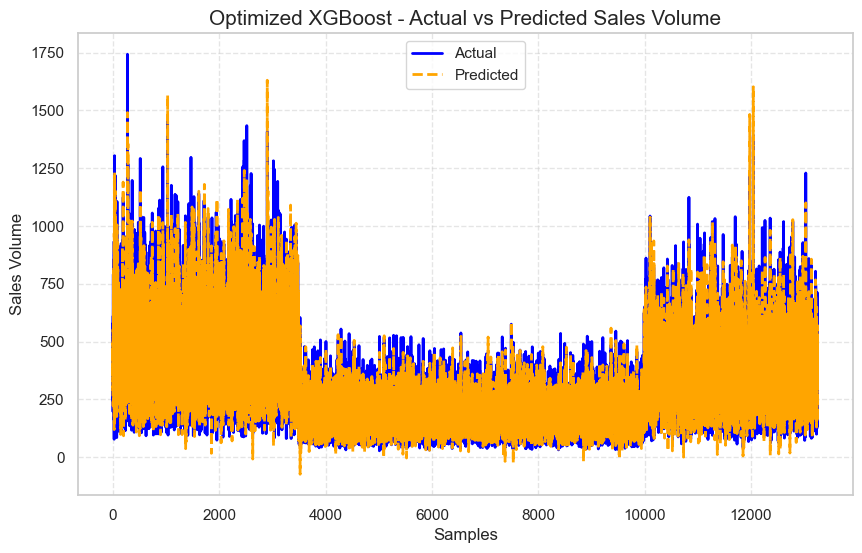

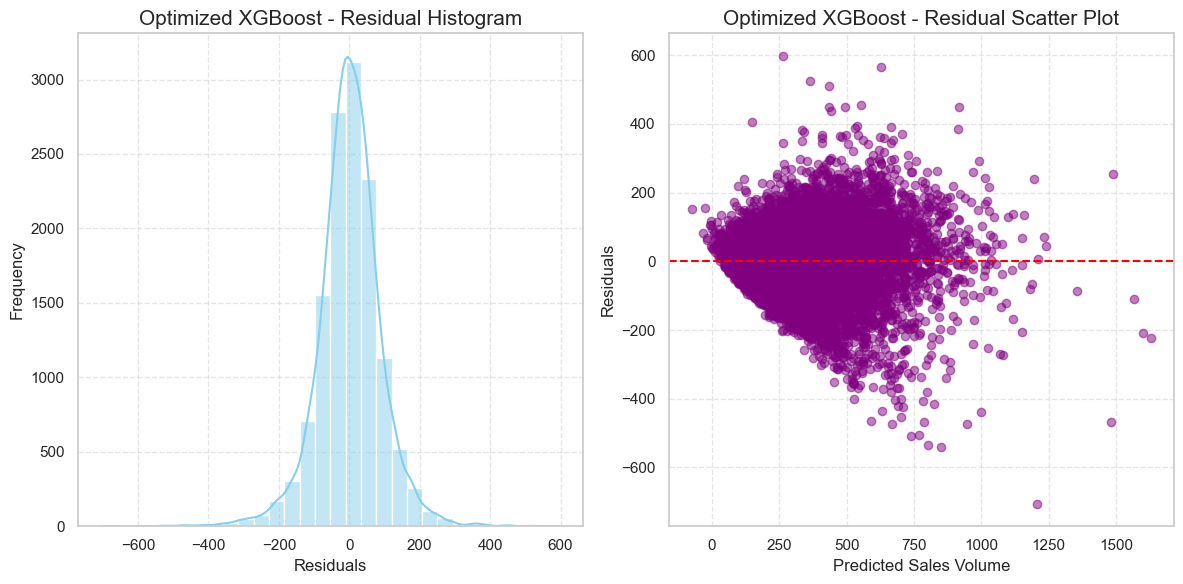

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Optimized SVM Model Summary: {'MAE': 76.15836732343708, 'MSE': 10990.918708299525, 'RMSE': 104.83758251838663, 'R2_Score': 0.7304514196506486}


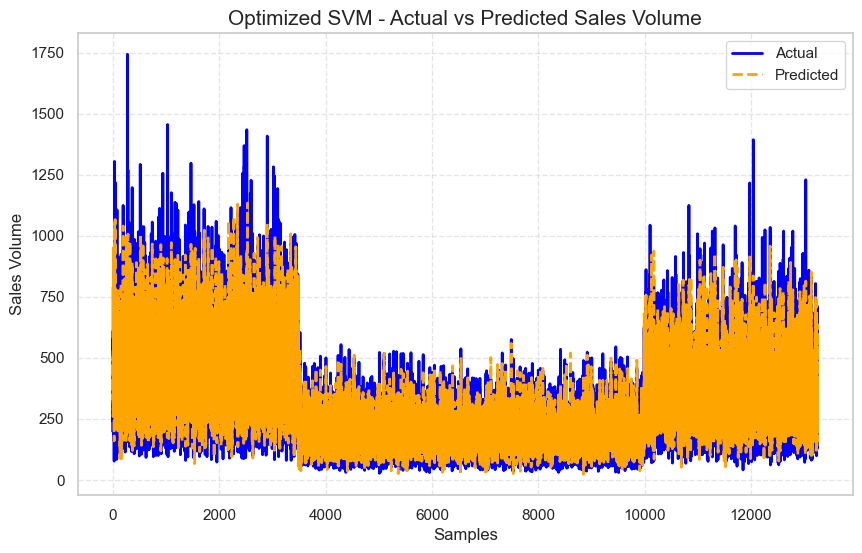

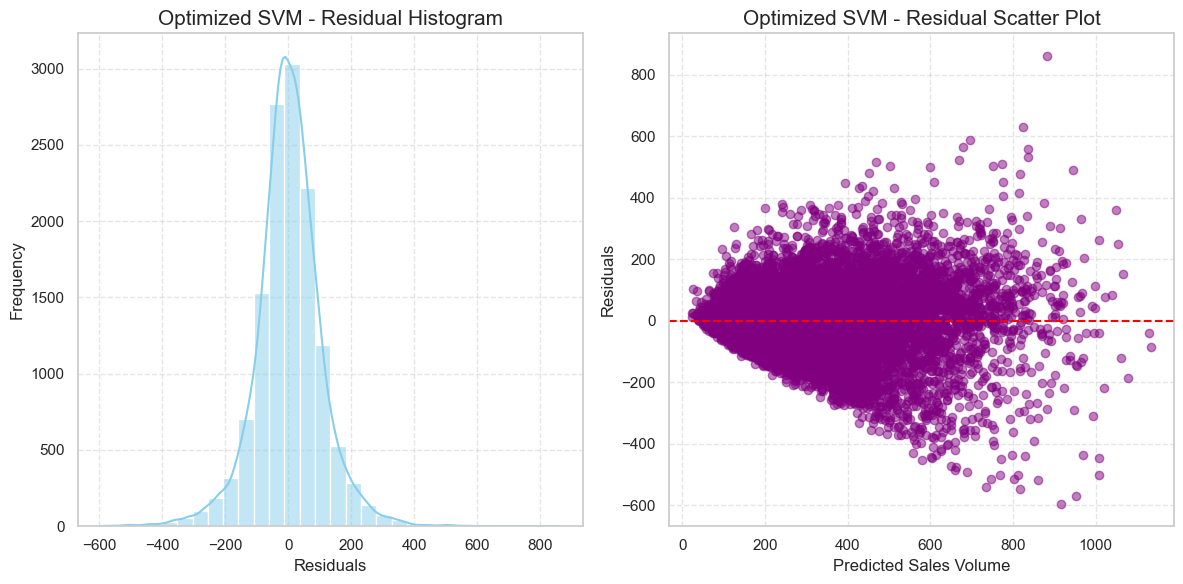

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 61300.0898 - val_loss: 26841.7539 - learning_rate: 0.0010
Epoch 2/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 35681.9180 - val_loss: 26940.1719 - learning_rate: 0.0010
Epoch 3/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 34821.2422 - val_loss: 26755.4238 - learning_rate: 0.0010
Epoch 4/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 35047.8164 - val_loss: 26605.5898 - learning_rate: 0.0010
Epoch 5/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 34591.5039 - val_loss: 26327.5352 - learning_rate: 0.0010
Epoch 6/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 35139.3008 - val_loss: 26022.2754 - learning_rate: 0.0010
Epoch 7/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 34261.8672 - val_loss: 25813.2812 - learning_rate: 0.0010
Epoch 8/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 34579.3828 - val_loss: 25957.6367 - learning_rate: 0.0010
Epoch 9/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/st

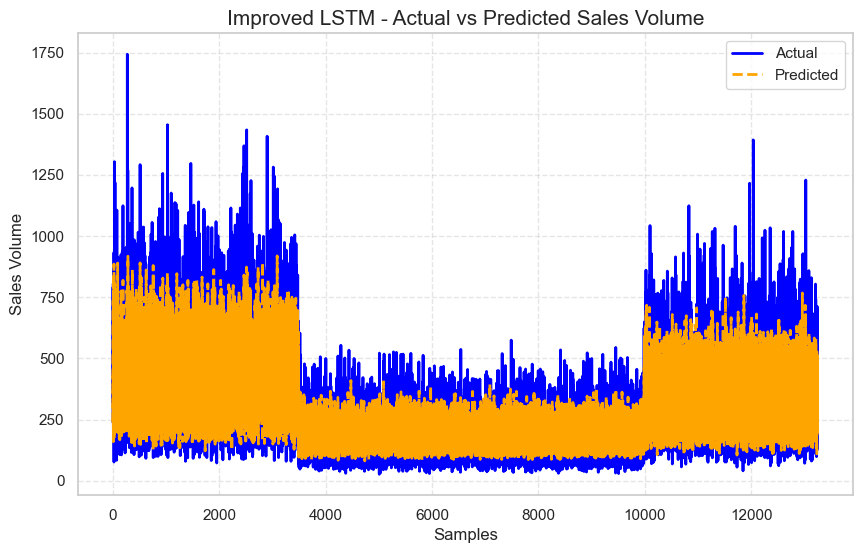

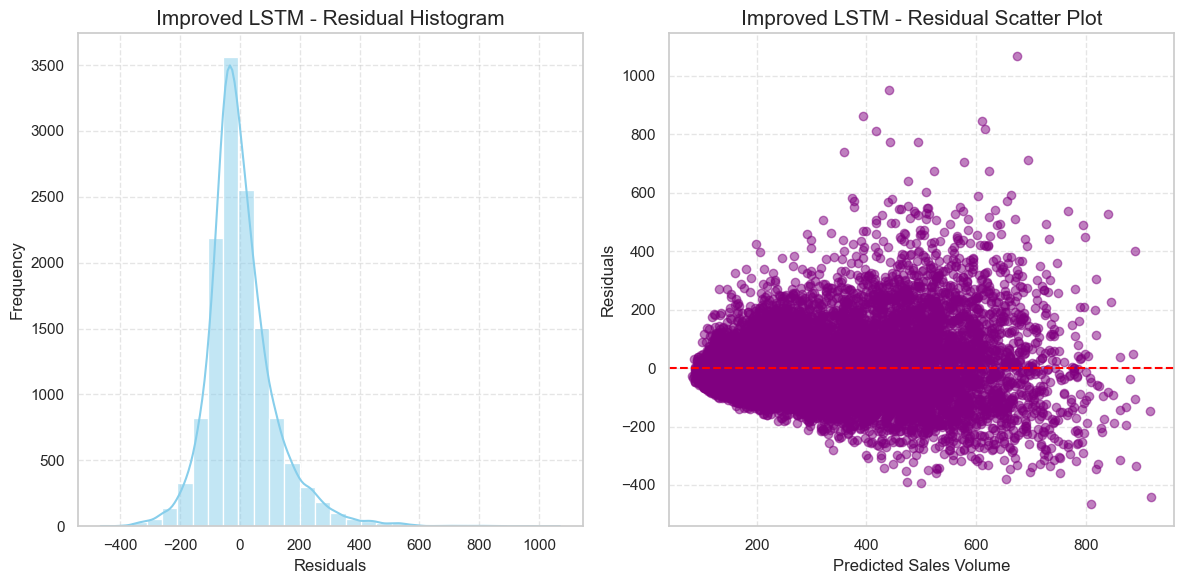

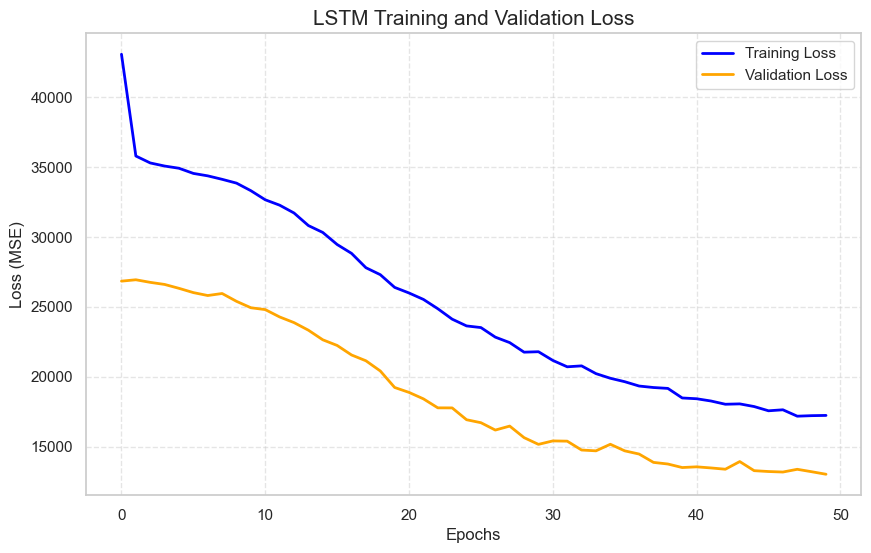

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset
df = pd.read_csv('/Users/naveenganta/Desktop/analytics/Projects/RI/Enhanced_Sales_Forecasting_Dataset_Realistic_Refined.csv')

# Feature Engineering
df['Sales_Volume_Lag1'] = df['Sales_Volume'].shift(1)
df['Sales_Volume_Lag3'] = df['Sales_Volume'].shift(3)
df['Sales_RollingMean3'] = df['Sales_Volume'].rolling(window=3).mean()
df['Sales_RollingStd3'] = df['Sales_Volume'].rolling(window=3).std()
df = df.dropna().reset_index(drop=True)
df = df.drop(columns=["Product_ID", "Date"], errors='ignore')  # Dropping non-relevant columns
df = pd.get_dummies(df, columns=["Season"], drop_first=True)

# Split features and target
X = df.drop(columns=["Sales_Volume"])
y = df["Sales_Volume"]

# Time-based train-test split
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2_Score": r2}, y_pred

# Function to plot Actual vs Predicted values with array check
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test if isinstance(y_test, np.ndarray) else y_test.values, label='Actual', color='blue', linewidth=2)
    plt.plot(y_pred, label='Predicted', color='orange', linestyle='--', linewidth=2)
    plt.title(f"{model_name} - Actual vs Predicted Sales Volume", fontsize=15)
    plt.xlabel("Samples", fontsize=12)
    plt.ylabel("Sales Volume", fontsize=12)
    plt.legend()
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.show()

# Residual Plot Function
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True, color="skyblue", bins=30)
    plt.title(f"{model_name} - Residual Histogram", fontsize=15)
    plt.xlabel("Residuals", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"{model_name} - Residual Scatter Plot", fontsize=15)
    plt.xlabel("Predicted Sales Volume", fontsize=12)
    plt.ylabel("Residuals", fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Random Forest with Hyperparameter Tuning
rf_params = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 20], "min_samples_split": [2, 5, 10]}
rf_model = RandomForestRegressor(random_state=42)
rf_search = GridSearchCV(rf_model, rf_params, cv=TimeSeriesSplit(n_splits=5), scoring="neg_mean_squared_error", verbose=1)
rf_search.fit(X_train, y_train)
best_rf_model = rf_search.best_estimator_
rf_results, y_pred_rf = evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)
print("Optimized Random Forest Model Summary:", rf_results)
plot_actual_vs_predicted(y_test, y_pred_rf, "Optimized Random Forest")
plot_residuals(y_test, y_pred_rf, "Optimized Random Forest")

# XGBoost with Hyperparameter Tuning
xgb_params = {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 10]}
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_search = GridSearchCV(xgb_model, xgb_params, cv=TimeSeriesSplit(n_splits=5), scoring="neg_mean_squared_error", verbose=1)
xgb_search.fit(X_train, y_train)
best_xgb_model = xgb_search.best_estimator_
xgb_results, y_pred_xgb = evaluate_model(best_xgb_model, X_train, X_test, y_train, y_test)
print("Optimized XGBoost Model Summary:", xgb_results)
plot_actual_vs_predicted(y_test, y_pred_xgb, "Optimized XGBoost")
plot_residuals(y_test, y_pred_xgb, "Optimized XGBoost")

# SVM Model with Hyperparameter Tuning
svm_params = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5], 'kernel': ['rbf']}
svm_model = SVR()
svm_search = GridSearchCV(svm_model, svm_params, cv=TimeSeriesSplit(n_splits=5), scoring="neg_mean_squared_error", verbose=1)
svm_search.fit(X_train_scaled, y_train)
best_svm_model = svm_search.best_estimator_
svm_results, y_pred_svm = evaluate_model(best_svm_model, X_train_scaled, X_test_scaled, y_train, y_test)
print("Optimized SVM Model Summary:", svm_results)
plot_actual_vs_predicted(y_test, y_pred_svm, "Optimized SVM")
plot_residuals(y_test, y_pred_svm, "Optimized SVM")

# LSTM Model for Sales Forecasting
sequence_length = 3
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, sequence_length)

# Build and tune LSTM model with callbacks
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.3),
    Dense(1)
])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = lstm_model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping, reduce_lr], verbose=1)

# Predicting with LSTM
y_pred_lstm = lstm_model.predict(X_test_seq).flatten()
lstm_results = {
    "MAE": mean_absolute_error(y_test_seq, y_pred_lstm),
    "MSE": mean_squared_error(y_test_seq, y_pred_lstm),
    "RMSE": np.sqrt(mean_squared_error(y_test_seq, y_pred_lstm)),
    "R2_Score": r2_score(y_test_seq, y_pred_lstm),
}

# Print the LSTM model results summary
print("Improved LSTM Model Summary:", lstm_results)

# Plotting Actual vs Predicted for LSTM
plot_actual_vs_predicted(y_test_seq, y_pred_lstm, "Improved LSTM")

# Enhanced Residual Plot for LSTM
plot_residuals(y_test_seq, y_pred_lstm, "Improved LSTM")

# Optional: Visualizing the training and validation loss over epochs for LSTM
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title("LSTM Training and Validation Loss", fontsize=15)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss (MSE)", fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

